# SETUP

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import np_utils

In [2]:
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 15s 3us/step


NameError: name 'np' is not defined

In [4]:
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [7]:
model = Sequential()
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), \
                kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], \
             optimizer=Adadelta())

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%time

hist = model.fit(X_train, Y_train, epochs=10, batch_size=600, \
                validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 18s - loss: 0.4117 - acc: 0.8557 - val_loss: 0.4332 - val_acc: 0.8466
Epoch 2/10
 - 18s - loss: 0.3976 - acc: 0.8603 - val_loss: 0.4137 - val_acc: 0.8532
Epoch 3/10
 - 18s - loss: 0.3869 - acc: 0.8648 - val_loss: 0.4030 - val_acc: 0.8566
Epoch 4/10
 - 18s - loss: 0.3785 - acc: 0.8680 - val_loss: 0.4000 - val_acc: 0.8587
Epoch 5/10
 - 18s - loss: 0.3702 - acc: 0.8716 - val_loss: 0.3922 - val_acc: 0.8607
Epoch 6/10
 - 18s - loss: 0.3628 - acc: 0.8738 - val_loss: 0.3931 - val_acc: 0.8631
Epoch 7/10
 - 19s - loss: 0.3578 - acc: 0.8758 - val_loss: 0.3795 - val_acc: 0.8691
Epoch 8/10
 - 19s - loss: 0.3536 - acc: 0.8771 - val_loss: 0.3754 - val_acc: 0.8674
Epoch 9/10
 - 18s - loss: 0.3487 - acc: 0.8794 - val_loss: 0.3773 - val_acc: 0.8703
Epoch 10/10
 - 18s - loss: 0.3471 - acc: 0.8788 - val_loss: 0.3774 - val_acc: 0.8666
CPU times: user 8min 36s, sys: 17.4 s, total: 8min 53s
Wall time: 3min 1s


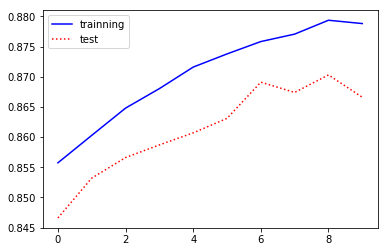

In [13]:
plt.plot(hist.history['acc'], 'b-', label="trainning")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [17]:
model.save("fashion_minist.hdf5")

In [18]:
l1 = model.layers[0]
w1, b1 = l1.get_weights()

NameError: name 'mpl' is not defined

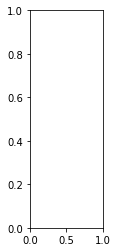

In [19]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

### VGG16

In [21]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [22]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 447s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_

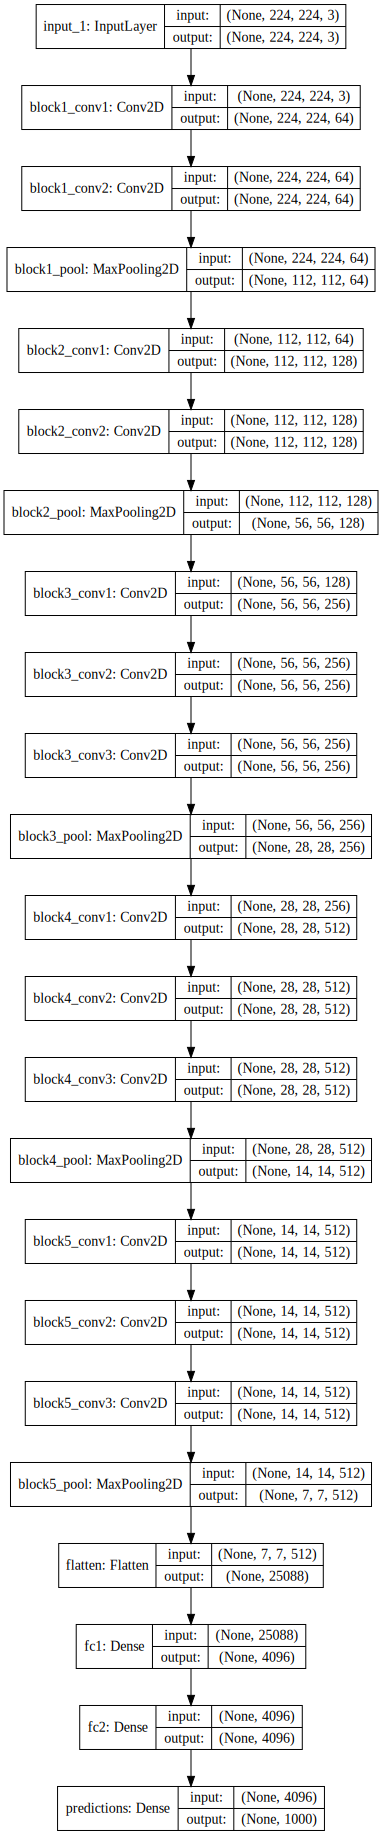

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

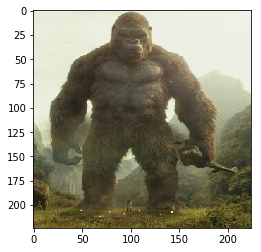

In [29]:
from PIL import Image

im = np.array(Image.open('kong.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [30]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)

label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

gorilla (21.05%)


tabby (85.89%)


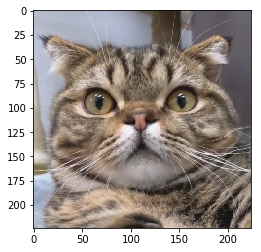

In [28]:
im2 = np.array(Image.open('cat.png').resize((224, 224)))
plt.imshow(im2)
plt.grid(False)

x2 = im2[np.newaxis, :, :, :]
yhat2 = model.predict(x2)

label2 = decode_predictions(yhat2)
label2 = label2[0][0]
print('%s (%.2f%%)' % (label2[1], label2[2]*100))